# Plots for Longstaff Schwartz using European Put and Call Values as regressors 
- Use some custom functions as regressors 
- put_call_quad= Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2),  # Example from office hours
- put_only = Y ~ S + put + I(S^2) + I(put^2),                     # Just put values
- put_call_cubic = Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2) + I(call^3) + I(put^3),  # Add cubic terms
- put_call_quad_int = Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2) + I(call*S) + I(put*S)  # Interaction terms

In [3]:
options(scipen = 999)
source("Functions.R") # Import the functions from the Functions.R file
library(RColorBrewer)
library(scatterplot3d)
library(ggplot2)
library(viridis)
library(plotly)

In [ ]:
# Fixed parameters 
K = 931.8 # At the money strike 
M = 50 # Number of time steps 
r = 0.005290473
S0 = 931.8 
sigma = 0.01026789

list_of_regressors <- list(
  put_call_quad= Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2),  # Example from office hours
  put_only = Y ~ S + put + I(S^2) + I(put^2),                     # Just put values
  put_call_cubic = Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2) + I(call^3) + I(put^3),  # Add cubic terms
  put_call_quad_int = Y ~ S + call + put + I(S^2) + I(call^2) + I(put^2) + I(call*S) + I(put*S)  # Interaction terms
)

list_of_N_values <- c(1000,5000,10000,50000,100000,500000,1000000) # Number of paths to simulate

In [ ]:
df_euro <- data.frame(N = integer(), Price = numeric(), Example = character())

for (i in seq_along(list_of_regressors)) {
  example_name <- names(list_of_regressors)[i]
  example_formula <- list_of_regressors[[i]]
  
  for (N in list_of_N_values) {
    price <- price_american_put_longstaff_schwartz_MC_euro(
      K = K, M = M, N = N, r = r, S0 = S0, sigma = sigma, polynomial = example_formula
    )
    df_euro <- rbind(df_euro, data.frame(N = N, Price = price, Example = example_name))
  }
}
df_euro$Error <- abs(df_euro$Price - 2.32429) # Price from Binomial Tree Convergence
write.csv(df_euro, "Data/ConvergenceErrorByNumberofSimPathsEuro.csv", row.names = FALSE) # Save the data frame to a CSV file

In [30]:
df_euro <- read.csv("Data/ConvergenceErrorByNumberofSimPathsEuro.csv") 

Warning message in viridisLite::viridis(n, alpha, begin, end, direction, option):
"Option 'K' does not exist. Defaulting to 'viridis'."


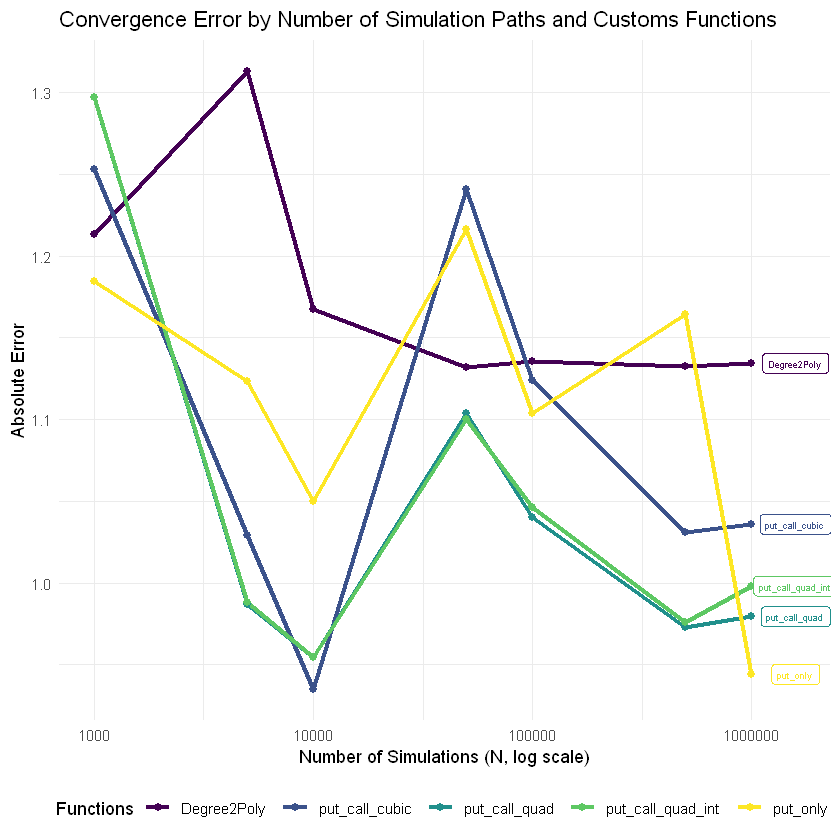

In [38]:
df_euro$Example<- as.factor(df_euro$Example)
ggplot(df_euro, aes(x = N, y = Error, color = Example, group = Example)) +
  geom_line(size = 1.2) +
  geom_point(size = 2) +
  geom_label(aes(label = as.character(Example)), 
             data = df_euro %>% group_by(Example) %>% filter(N == max(N)) %>% ungroup(),show.legend = FALSE,size = 2,nudge_x = 0.20) +
  scale_x_log10() +  
  expand_limits(x = max(df_euro$N) * 1.2) +
  scale_color_viridis_d(option = "K", name = "Functions") +
  labs(title = "Convergence Error by Number of Simulation Paths and Customs Functions",
       x = "Number of Simulations (N, log scale)",
       y = "Absolute Error") +
  theme_minimal() +
  theme(legend.position = "bottom"
          )